<a href="https://colab.research.google.com/github/Yuyan-C/MAIS202Project/blob/main/Deliverable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier



## **Data Preprocessing**
Use first 371848 records for training, next 92962 records for validation, and last 116202 records for testing.

Normalize the data using min-max scalar.




In [4]:
df = pd.read_csv('covtype.csv')
x = df['Horizontal_Distance_To_Hydrology'].values
y = df['Vertical_Distance_To_Hydrology'].values
distance = np.sqrt(np.square(x)+np.square(y))
df = df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1)
df.insert(3, "Distance_To_Hydrology", distance)
df.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258.000000,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212.084889,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,275.769832,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,269.235956,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153.003268,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
# set the number of training set, validation set, and testing set
# get the number of features 
num_features = len(df.columns)-1
# set X and y
scaler = MinMaxScaler() 
X = scaler.fit_transform(df.iloc[:, :num_features])
y = df.iloc[:, num_features:].to_numpy().reshape(len(df.index))

# Naive Random Sampling


In [6]:
# set training, validation, and testing sets
# 64% training, 16% validation, 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle = True)#
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# SGDClassifier


In [5]:
# result with Naive Random Sampling
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print("training accuracy: {}".format(clf.score(X_train,y_train)))
print("validation accuracy: {}".format(clf.score(X_valid,y_valid)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)
plt.show()
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False,cmap="YlGnBu")
plt.show()
 

KeyboardInterrupt: ignored

In [ ]:
# result with SMOTE
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print("training accuracy: {}".format(clf.score(X_train,y_train)))
print("validation accuracy: {}".format(clf.score(X_valid,y_valid)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False)


In [ ]:
sgdc = SGDClassifier(eta0=0.1)
parameters = { 'alpha': [0.0001,0.001],
              'epsilon':[0.01, 0.1], 
              'learning_rate': ['constant','optimal']}
clf = GridSearchCV(sgdc, param_grid=parameters,cv=5, refit=True, verbose=3)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(classification_report(y_test, clf.predict(X_test))) 

# Support Vector Machine


In [ ]:
clf = LinearSVC(random_state=0)
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train, y_train)
print(datetime.now().strftime("%H:%M:%S.%f"))
print("fitting...")
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train,y_train)
print("predicting training set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_train_pred = clf.predict(X_train)
print("predicting validation set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_valid_pred = clf.predict(X_valid)
print("predicting testing set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_test_pred = clf.predict(X_test)
print("training accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("validation accuracy: {}".format(accuracy_score(y_valid,y_valid_pred)))
print("testing accuracy: {}".format(accuracy_score(y_test,y_test_pred)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
print("testing accuracy (balanced): {}".format(balanced_accuracy_score(y_test, y_test_pred)))
print(datetime.now().strftime("%H:%M:%S.%f"))
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)
plt.show()
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False,cmap="YlGnBu")
plt.show()

08:37:37.900202


In [ ]:
cf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("confusion matrix for validation set:\n {}".format(cf_matrix_test))
sns.heatmap(cf_matrix_test, annot=False)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5) 

In [ ]:
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print("training accuracy: {}".format(clf.score(X_train,y_train)))
print("testing accuracy: {}".format(clf.score(X_valid,y_valid)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("testing accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
print(datetime.now().strftime("%H:%M:%S.%f"))
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)

In [ ]:
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False)

# Random Forest


08:38:31.559664
08:44:18.165234
fitting...
08:44:18.165748
predicting training set...
08:49:42.191236
predicting validation set...
08:50:21.348480
predicting testing set...
08:50:25.649321
training accuracy: 1.0
validation accuracy: 0.9488070394354683
testing accuracy: 0.9495279812053045
training accuracy (balanced): 1.0
validation accuracy (balanced): 0.9126671086311477
testing accuracy (balanced): 0.9113335884551214
08:50:32.099275
confusion matrix for training set:
 [[181445      0      0      0      0      0      0]
 [     0 181445      0      0      0      0      0]
 [     0      0 181445      0      0      0      0]
 [     0      0      0 181445      0      0      0]
 [     0      0      0      0 181445      0      0]
 [     0      0      0      0      0 181445      0]
 [     0      0      0      0      0      0 181445]]


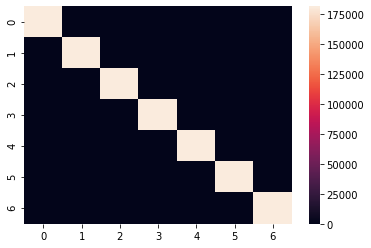

confusion matrix for validation set:
 [[31737  1342     2     0    17     0   127]
 [ 1901 43642    63     0   223    71    20]
 [    3   143  5543    49    24   227     0]
 [    0     0    23   400     0    11     0]
 [   12   116     5     0  1229     3     0]
 [    6    88   136    14     8  2456     0]
 [  100    25     0     0     0     0  3196]]


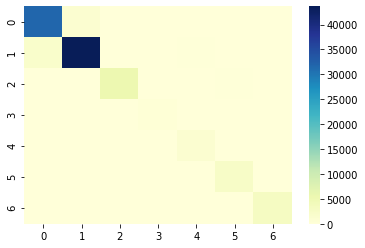

In [7]:
clf = RandomForestClassifier()
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train, y_train)
print(datetime.now().strftime("%H:%M:%S.%f"))
print("fitting...")
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train,y_train)
print("predicting training set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_train_pred = clf.predict(X_train)
print("predicting validation set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_valid_pred = clf.predict(X_valid)
print("predicting testing set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_test_pred = clf.predict(X_test)
print("training accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("validation accuracy: {}".format(accuracy_score(y_valid,y_valid_pred)))
print("testing accuracy: {}".format(accuracy_score(y_test,y_test_pred)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
print("testing accuracy (balanced): {}".format(balanced_accuracy_score(y_test, y_test_pred)))
print(datetime.now().strftime("%H:%M:%S.%f"))
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)
plt.show()
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False,cmap="YlGnBu")
plt.show()